# introdution
Here I will investigate TMDB data base for over 10000 movie, Hope to find a succsee formula for movies. Dose high budget movie has a higher chance ?
or people have Favourable  geners ?  what is the charcterstics of movies having more revenue ?

In [146]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [147]:
# adding some fuctions that shorten my work this function  will use pandas.DataFrame.query for selecting on certain condition then  plotting a bar chart
def plotting_selection (x, y , x_label, y_label):
    median = df['{}'.format(x)].median()
    low = df.query('{} < {}'.format(x, median))
    high = df.query('{} >= {}'.format(x,median))
    mean_low = low['{}'.format(y)].mean()
    mean_high = high['{}'.format(y)].mean()
    locations = [1, 2]
    heights = [mean_low, mean_high]
    labels = ['{}'.format(x_label), '{}'.format(y_label)]
    plt.bar(locations, heights, tick_label=labels)
    return
# x = dataFrame column name - str
# y = dataFrame column name - str
# x_label = label will be represented on x-axis-heights(1) of bar chart -str
# y_label = label will be represented on x-axis-heights(2) of bar chart - str

# Data wrangling 
here i will load my data and perform some checks for cleanliness, and then dataset for analysis.

In [148]:
#loading csv file 
df = pd.read_csv('tmdb-movies.csv')

In [149]:
#see some data 
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [150]:
# know more about data

df.shape

(10866, 21)

In [151]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [152]:
# first i will drop some columns i dont need in my analysis
df.drop(['imdb_id', 'homepage', 'keywords', 'tagline', 'overview', 'release_date'], axis= 1, inplace= True)

In [153]:
# re-check 
df.tail(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,15,1.5,1966,127642.279154,0.0


In [154]:
df.shape


(10866, 15)

In [155]:
# i saw some data have 0 value at revenue column i will delete them all as they will mislead me 
df.drop(df[df['revenue'] == 0].index, inplace = True)

In [156]:
df.shape

(4850, 15)

In [157]:
#re-check if there 0 values 
df.query('revenue == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [158]:
#check for duplicates
sum(df.duplicated())

1

In [159]:
#droping this duplicate
df.drop_duplicates(inplace= True)

In [160]:
#re-check for duplicates
sum(df.duplicated())

0

In [161]:
#checking for nan-values
df.isna().sum()


id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     5
director                 1
runtime                  0
genres                   0
production_companies    96
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [162]:
#droping NAN values
df.dropna(inplace= True)

In [163]:
#re-check 
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [164]:
df.shape

(4750, 15)

In [165]:
# see budget has 0 value
df.query('budget == 0')


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,81,5.5,2015,0.0,4.222338e+04
88,301875,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,135,5.6,2015,0.0,1.839999e+06
95,258509,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,278,5.7,2015,0.0,2.150550e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,11455,0.608679,0,41590893,Up in Smoke,Cheech Marin|Tommy Chong|Strother Martin|Edie ...,Lou Adler,86,Comedy,Paramount Pictures,103,6.5,1978,0.0,1.390259e+08
10766,23916,0.591799,0,7185518,Paradise Alley,Sylvester Stallone|Lee Canalito|Armand Assante...,Sylvester Stallone,107,Action|Adventure|Drama,Image Ten,12,6.0,1978,0.0,2.401904e+07
10812,31948,0.318883,0,5438927,Gray Lady Down,Charlton Heston|David Carradine|Stacy Keach|Ne...,David Greene,111,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,10,6.1,1978,0.0,1.818071e+07
10817,13963,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,117,Documentary|Music,FM Productions|Last Waltz Inc.,33,8.0,1978,0.0,1.076189e+06


In [166]:
#droping
df.drop(df[df['budget'] == 0].index, inplace = True)

In [167]:
df.shape

(3805, 15)

In [168]:
#we have numbers in millions that is dificult to read lits simplify it
large_numbers_columns = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
for c in large_numbers_columns:
    df[c] = df[c].apply(lambda x : x/1000000)
    df[c] = df[c].round(3)

In [169]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150.0,1513.529,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,138.0,1392.446


In [170]:
# some columns has "|" character in its value 
col = ['cast', 'genres', 'production_companies']
for co in col:
    df[co]= df[co].str.split('|')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150.0,1513.529,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,138.0,1392.446


# Exploratory Data Analysis

In [171]:
# lets know more about data statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,37.607997,108.973387,109.351117,534.159001,6.170565,2001.229172,44.719757,138.715932
std,67585.708616,1.480569,42.321791,177.297597,19.845678,883.757588,0.792437,11.329616,44.886979,216.997314
min,5.000000,0.010335,0.000000,0.000000,15.000000,10.000000,2.200000,1960.000000,0.000000,0.000000
25%,5925.000000,0.470651,10.000000,14.334000,96.000000,74.000000,5.700000,1995.000000,13.546000,19.254000
50%,11253.000000,0.810805,25.000000,46.217000,106.000000,209.000000,6.200000,2004.000000,30.384000,62.847000
75%,38579.000000,1.387163,50.000000,126.070000,119.000000,584.000000,6.700000,2010.000000,60.842000,165.805000
max,417859.000000,32.985763,425.000000,2781.506000,338.000000,9767.000000,8.400000,2015.000000,425.000000,2827.124000


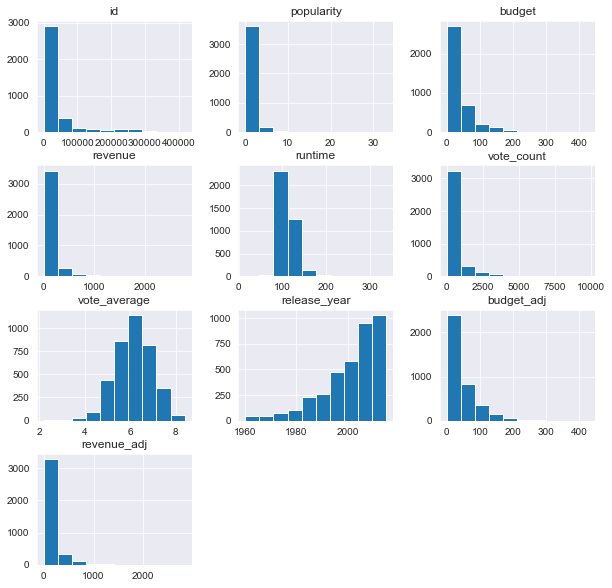

In [172]:
df.hist(figsize= (10,10));

## is there in correlation between high vote average and high revenue ?
As shown below on the graph. ***yes***, it seems that higher revenue movies has a high voting average. 

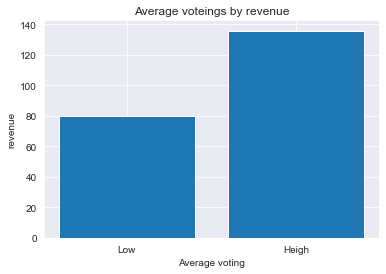

In [173]:
plotting_selection('vote_average', 'revenue', 'Low', 'Heigh')

# Adding some details
plt.title('Average voteings by revenue')
plt.ylabel('revenue')
plt.xlabel('Average voting');

## is there in correlation between high budget and high revenue ?
As shown below on the graph. yes, it seems that higher revenue movies has a higher budget.

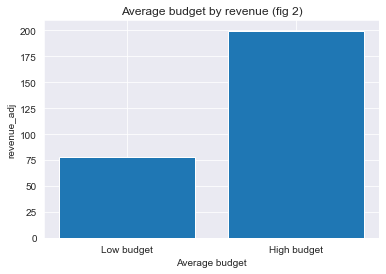

In [174]:
plotting_selection('budget', 'revenue_adj', 'Low budget', 'High budget')
#adding details to bar chart
plt.title('Average budget by revenue (fig 2)')
plt.ylabel('revenue_adj')
plt.xlabel('Average budget');

## What kinds of properties are associated with movies that have high revenues?
from this simple Statics i will here focus on 25% and 75% as the majorty of this data fall here. so we can see that higher revenue movies seems to be released betwwen 1994 & 2010. and they earn voting average between 5.9 to 7.

In [175]:
top_revenue = df.query('revenue_adj > revenue_adj.mean()')
top_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,29515.623986,2.135908,70.694974,287.409658,116.647430,1201.192065,6.432101,1999.752029,82.663308,369.613230
std,55246.826339,2.218869,56.528811,245.310979,22.464837,1297.990177,0.719705,12.444853,55.141697,287.800565
min,11.000000,0.131526,0.000000,25.000000,69.000000,13.000000,4.100000,1960.000000,0.000000,138.781000
25%,1265.000000,1.011546,27.000000,149.045000,100.000000,332.000000,5.900000,1994.000000,39.720000,188.297000
50%,9268.000000,1.588457,60.000000,209.947000,114.000000,728.000000,6.400000,2003.000000,73.011000,269.859000
75%,24428.000000,2.523173,100.000000,347.326000,130.000000,1611.000000,7.000000,2010.000000,113.969000,440.960000
max,417859.000000,32.985763,380.000000,2781.506000,248.000000,9767.000000,8.300000,2015.000000,368.371000,2827.124000


## is there in correlation between release year and high voting chance ?
the following graph is a simple sactterd plots you can see the releas year on x-axis and voting count on y-axis, you can see that the more we go on the way of 2015 the more voting count we have. i followed it by (fig 3) a bar chart represent this correlation.


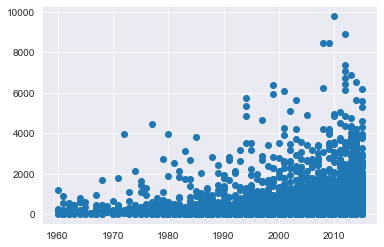

In [176]:
plt.scatter(df['release_year'], df['vote_count']);

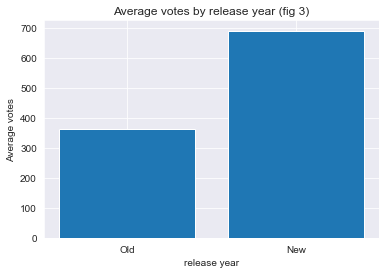

In [177]:
plotting_selection('release_year', 'vote_count', 'Old', 'New')
# adding details to  a bar chart
plt.title('Average votes by release year (fig 3)')
plt.xlabel('release year')
plt.ylabel('Average votes');

## which genres associated with high revnue ?

In [178]:
high_revnue = df.query('revenue_adj > revenue_adj.mean()')
genres_dict = {}
for i in high_revnue['genres']:
    for j in i:
        if j not in genres_dict:
            genres_dict[j] = 1
        else:
            genres_dict[j] +=1 

In [179]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [180]:
list_list = to_1D(high_revnue['genres']).value_counts()

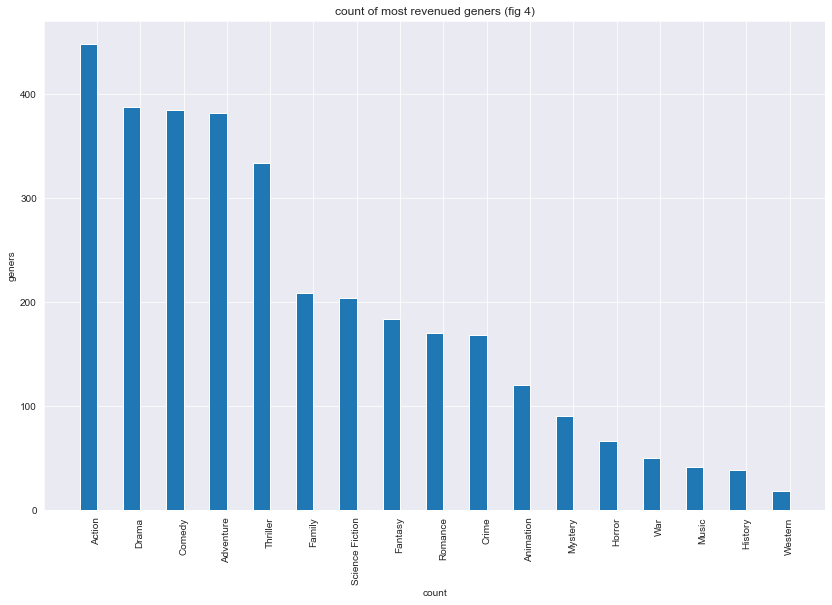

In [181]:
#creating numpy array to plotting

ind = np.arange(len(to_1D(high_revnue['genres']).value_counts()))
width = 0.4

# plotting 
plt.bar(ind, list_list, width, label= list_list.index)


# title and labels
plt.ylabel('geners')
plt.xlabel('count')
plt.title('count of most revenued geners (fig 4)')
locations = ind + width / 2  # xtick locations
labels = list_list.index  # xtick labels
plt.xticks(locations, labels);

#adjustment
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.rcParams.update({'font.size': 12})

## Conclusions

it seems to be that movies which has high revenue has some characteristics:-  

it **costs more**, the more you spend **may** lead to high revenue as seen in *(fig 2)* the gap is very obvious.

people seems to **like newest movies** than oldest as seen in *(fig 3)* and when we look at statistics most high revenue movies fall in 1994 to 2010 section and the look of scatter plot of years vs vote count you can detect that people like to review and vote for new movies 

according to *(fig 4)* its looks like people has more interest in **Action movies** than western or history movies. we can do the same steps to see which company and which cast has high revenue.

### Limitations 


this statics has few statical operations so the Conclusion is primative we can use it as a guide fore more investigations, but i found a lot of zero revenue movies which limits my data as by cleaning it i lost more than half which lead to no sufficient analysis as those delete was more from old movies . data entery in cast and compny, ...etc , has a weird manner which concume more time to clean it to be useful. 